# Read CSV

In [57]:
import pandas as pd
df = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
print("Shape of datasset",df.shape)
df.head()

Shape of datasset (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Visualization

Distribution of Some Interesting Discrete Features


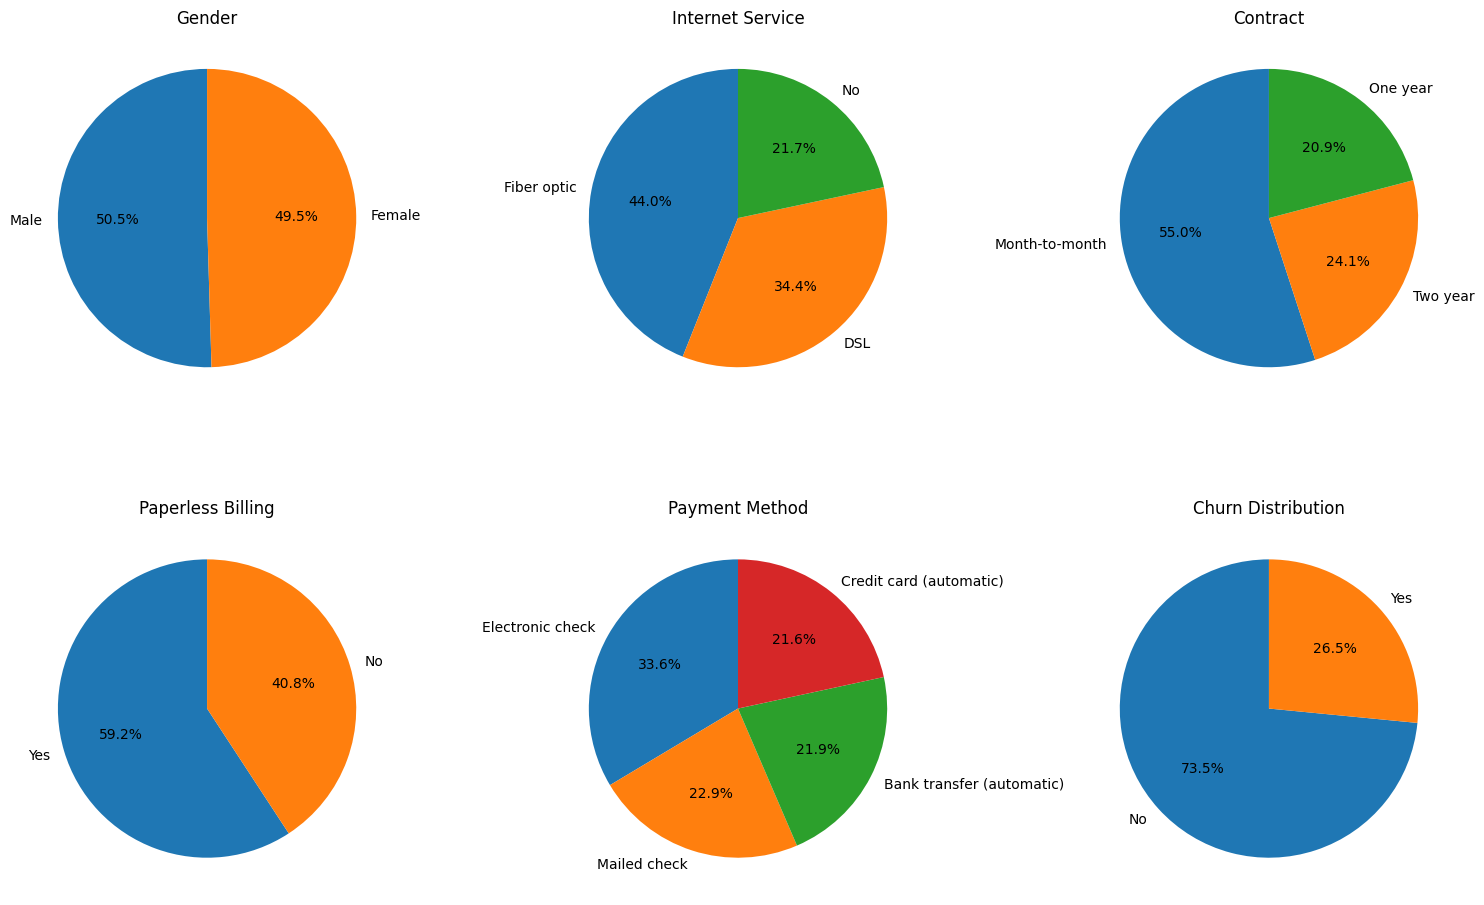

In [56]:
import matplotlib.pyplot as plt

print("Distribution of Some Interesting Discrete Features")

# Define the data for each pie chart
gender_counts = df['gender'].value_counts()
internet_counts = df['InternetService'].value_counts()
contract_counts = df['Contract'].value_counts()
paperless_billing_counts = df['PaperlessBilling'].value_counts()
payment_method_counts = df['PaymentMethod'].value_counts()
churn_counts = df['Churn'].value_counts()



# Create a figure with multiple subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Plot each pie chart in its corresponding subplot
axs[0, 0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
axs[0, 0].set_title('Gender')

axs[0, 1].pie(internet_counts, labels=internet_counts.index, autopct='%1.1f%%', startangle=90)
axs[0, 1].set_title('Internet Service')

axs[0, 2].pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%', startangle=90)
axs[0, 2].set_title('Contract')

axs[1, 0].pie(paperless_billing_counts, labels=paperless_billing_counts.index, autopct='%1.1f%%', startangle=90)
axs[1, 0].set_title('Paperless Billing')

axs[1, 1].pie(payment_method_counts, labels=payment_method_counts.index, autopct='%1.1f%%', startangle=90)
axs[1, 1].set_title('Payment Method')

axs[1, 2].pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
axs[1, 2].set_title('Churn Distribution')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


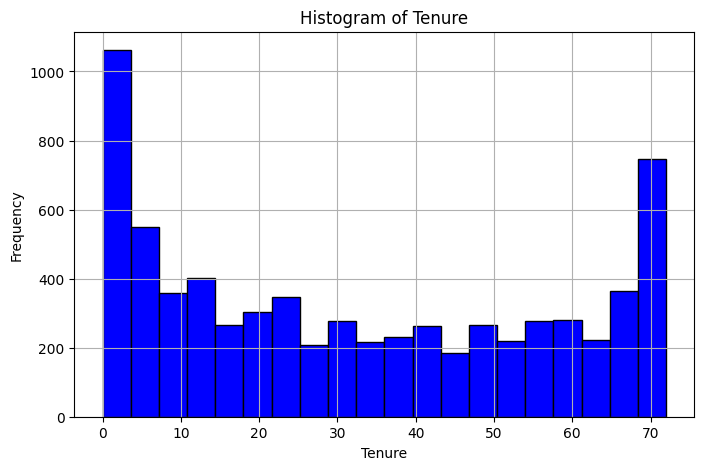

In [70]:
plt.figure(figsize=(8, 5))
plt.hist(df['tenure'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Histogram of Tenure')
plt.grid(True)
plt.show()

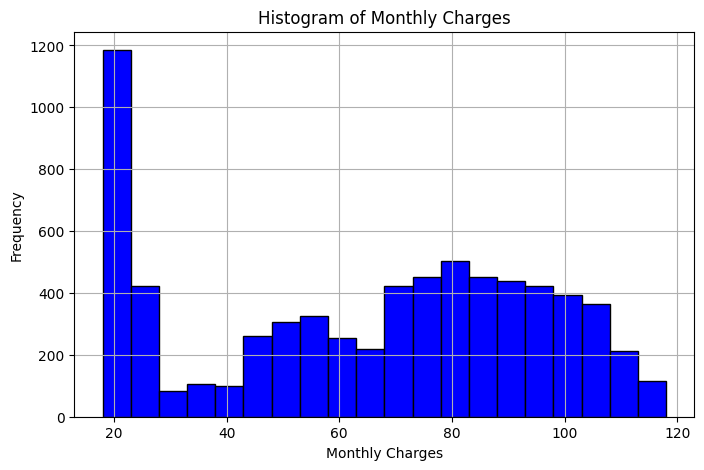

In [35]:
total_charges_data = df['MonthlyCharges'].astype('int')
plt.figure(figsize=(8, 5))
plt.hist(total_charges_data, bins=20, color='blue',edgecolor='black')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.title('Histogram of Monthly Charges')
plt.grid(True)
plt.show()

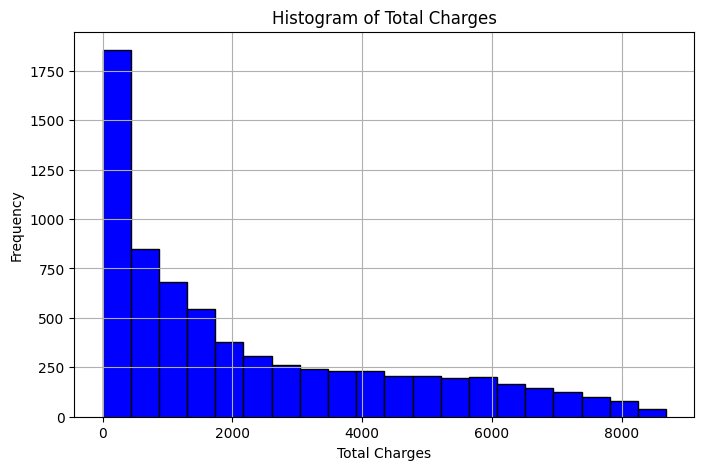

In [36]:
total_charges_data = df['TotalCharges'].replace(['', ' '], '0').astype('float').round(2).astype('int')
plt.figure(figsize=(8, 5))
plt.hist(total_charges_data, bins=20, color='blue',edgecolor='black')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.title('Histogram of Total Charges')
plt.grid(True)
plt.show()

# Preprocessing

In [37]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Eleminate customerID
ds = df.loc[:, df.columns[1:]]

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# List of columns to be label encoded
label_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

# Apply label encoding
for col in label_cols:
    ds[col] = label_encoder.fit_transform(ds[col])

# Convert MonthlyCharges to int
ds['MonthlyCharges'] = ds['MonthlyCharges'].astype('int')

# Handle TotalCharges conversion
ds['TotalCharges'] = ds['TotalCharges'].replace(['', ' '], '0').astype('float').round(2).astype('int')

# Convert Churn to int
ds['Churn'] = ds['Churn'].astype('int')

print(ds.shape)
ds.head(10)


(7043, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29,29,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56,1889,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53,108,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42,1840,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70,151,1
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99,820,1
6,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89,1949,0
7,0,0,0,0,10,0,1,0,2,0,0,0,0,0,0,0,3,29,301,0
8,0,0,1,0,28,1,2,1,0,0,2,2,2,2,0,1,2,104,3046,1
9,1,0,0,1,62,1,0,0,2,2,0,0,0,0,1,0,0,56,3487,0


# Apply PCA

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

features = ds.drop('Churn', axis=1)
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

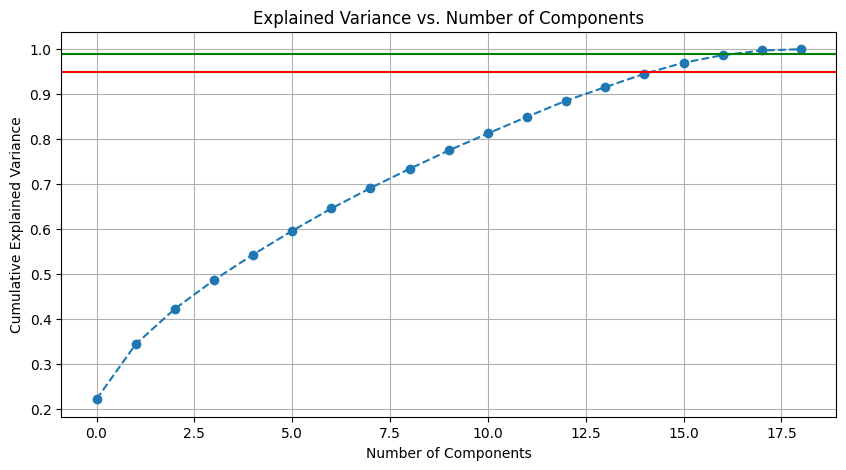

In [39]:
# Fit PCA with all components
pca = PCA(n_components=None)
pca.fit(scaled_features)

# Variance explained by each component
explained_variance_ratio = pca.explained_variance_ratio_

# Plot cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()
plt.figure(figsize=(10, 5))
plt.plot(cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.axhline(y=0.99, color='g', linestyle='-')
plt.grid()
plt.show()

In [40]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_ds = pd.DataFrame(pca.fit_transform(ds), columns=['comp1', 'comp2', 'comp3'])
pca_ds.head()

,comp1,comp2,comp3
0,-2250.677063,-9.233824,-17.059636
1,-390.292556,-6.691990,2.373069
2,-2171.466998,11.537934,-6.550816
3,-439.310484,-23.939581,6.707235
4,-2128.323746,26.640589,0.480017


# Logestic Regression

In [41]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(pca_ds, ds['Churn'], test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (5634, 3) (5634,)
Test set: (1409, 3) (1409,)


In [42]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [43]:
y_predict = LR.predict(x_test)

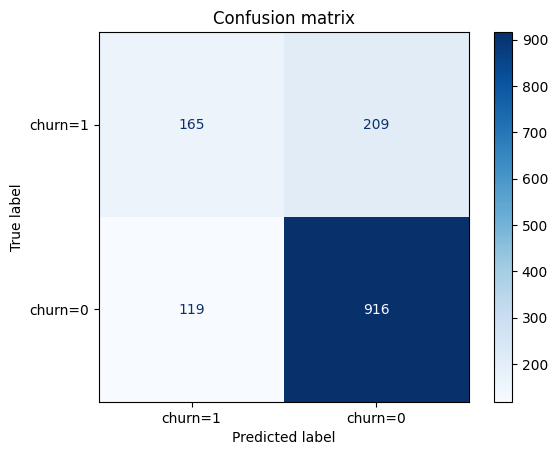

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

cnf_matrix = confusion_matrix(y_test, y_predict, labels=[1, 0])
np.set_printoptions(precision=2)

disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=['churn=1', 'churn=0'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.show()

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy = accuracy_score(y_test, y_predict)
precision_remain = precision_score(y_test, y_predict, pos_label=0)
precision_churn = precision_score(y_test, y_predict, pos_label=1)
recall_remain = recall_score(y_test, y_predict, pos_label=0)
recall_churn = recall_score(y_test, y_predict, pos_label=1)

print('Classifier accuracy: ' + "{0:.2f}".format(accuracy*100) + '%')
print('Precision w.r.t class remain: ' + "{0:.2f}".format(precision_remain))
print('Precision w.r.t class chrun: ' + "{0:.2f}".format(precision_churn))
print('Recall w.r.t class remain: ' + "{0:.2f}".format(recall_remain))
print('Recall w.r.t class chrun: ' + "{0:.2f}".format(recall_churn))

Classifier accuracy: 76.72%
Precision w.r.t class remain: 0.81
Precision w.r.t class chrun: 0.58
Recall w.r.t class remain: 0.89
Recall w.r.t class chrun: 0.44


# K-means

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_predict=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_predict)
    std_acc[n-1]=np.std(y_predict==y_test)/np.sqrt(y_predict.shape[0])

mean_acc

array([0.73, 0.76, 0.75, 0.77, 0.76, 0.78, 0.77, 0.78, 0.77])

In [47]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.7799858055358411 with k= 6


In [48]:
neigh = KNeighborsClassifier(n_neighbors = mean_acc.argmax()+1).fit(X_train,y_train)
y_predict=neigh.predict(x_test)
mean_acc[n-1] = metrics.accuracy_score(y_test, y_predict)
std_acc[n-1]=np.std(y_predict==y_test)/np.sqrt(y_predict.shape[0])

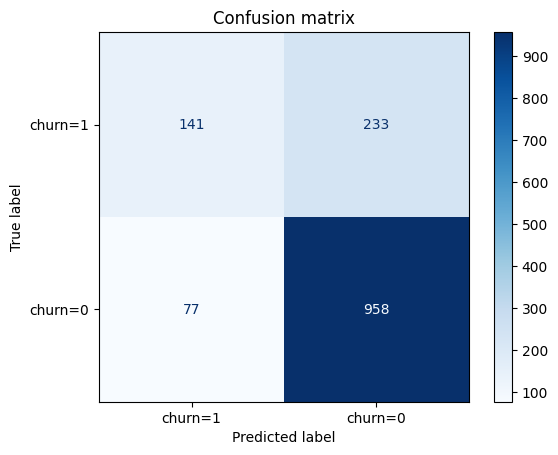

In [49]:
import numpy as np
import matplotlib.pyplot as plt

cnf_matrix = confusion_matrix(y_test, y_predict, labels=[1, 0])
np.set_printoptions(precision=2)

disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=['churn=1', 'churn=0'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.show()

In [50]:
accuracy = accuracy_score(y_test, y_predict)
precision_remain = precision_score(y_test, y_predict, pos_label=0)
precision_churn = precision_score(y_test, y_predict, pos_label=1)
recall_remain = recall_score(y_test, y_predict, pos_label=0)
recall_churn = recall_score(y_test, y_predict, pos_label=1)

print('Classifier accuracy: ' + "{0:.2f}".format(accuracy*100) + '%')
print('Precision w.r.t class remain: ' + "{0:.2f}".format(precision_remain))
print('Precision w.r.t class chrun: ' + "{0:.2f}".format(precision_churn))
print('Recall w.r.t class remain: ' + "{0:.2f}".format(recall_remain))
print('Recall w.r.t class chrun: ' + "{0:.2f}".format(recall_churn))

Classifier accuracy: 78.00%
Precision w.r.t class remain: 0.80
Precision w.r.t class chrun: 0.65
Recall w.r.t class remain: 0.93
Recall w.r.t class chrun: 0.38


# SVM

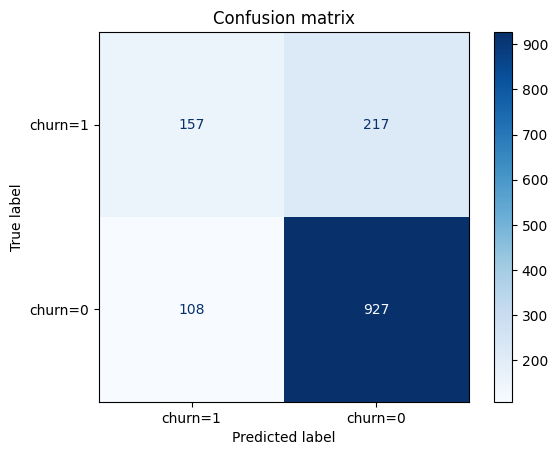

Classifier accuracy: 76.93%
Precision w.r.t class remain: 0.81
Precision w.r.t class chrun: 0.59
Recall w.r.t class remain: 0.90
Recall w.r.t class chrun: 0.42


In [51]:
from sklearn.svm import SVC

kernel = 'linear'

model = SVC(kernel=kernel)
model.fit(X_train, y_train)

y_predict = model.predict(x_test)


cnf_matrix = confusion_matrix(y_test, y_predict, labels=[1, 0])
np.set_printoptions(precision=2)

disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=['churn=1', 'churn=0'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.show()


accuracy = accuracy_score(y_test, y_predict)
precision_remain = precision_score(y_test, y_predict, pos_label=0)
precision_churn = precision_score(y_test, y_predict, pos_label=1)
recall_remain = recall_score(y_test, y_predict, pos_label=0)
recall_churn = recall_score(y_test, y_predict, pos_label=1)

print('Classifier accuracy: ' + "{0:.2f}".format(accuracy*100) + '%')
print('Precision w.r.t class remain: ' + "{0:.2f}".format(precision_remain))
print('Precision w.r.t class chrun: ' + "{0:.2f}".format(precision_churn))
print('Recall w.r.t class remain: ' + "{0:.2f}".format(recall_remain))
print('Recall w.r.t class chrun: ' + "{0:.2f}".format(recall_churn))

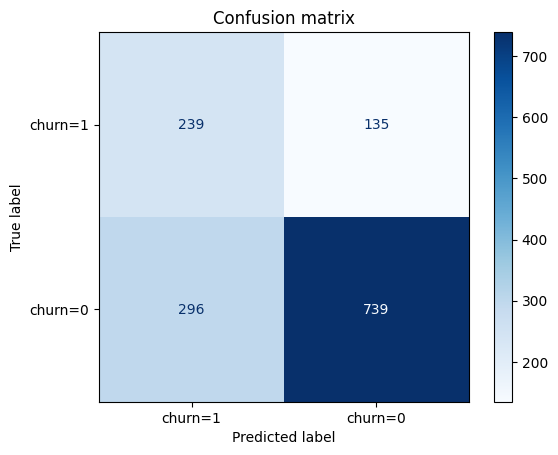

Classifier accuracy: 69.41%
Precision w.r.t class remain: 0.85
Precision w.r.t class chrun: 0.45
Recall w.r.t class remain: 0.71
Recall w.r.t class chrun: 0.64


In [52]:
kernel = 'rbf'

model = SVC(kernel=kernel, class_weight='balanced')
model.fit(X_train, y_train)

y_predict = model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_predict, labels=[1, 0])
np.set_printoptions(precision=2)

disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=['churn=1', 'churn=0'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.show()

accuracy = accuracy_score(y_test, y_predict)
precision_remain = precision_score(y_test, y_predict, pos_label=0)
precision_churn = precision_score(y_test, y_predict, pos_label=1)
recall_remain = recall_score(y_test, y_predict, pos_label=0)
recall_churn = recall_score(y_test, y_predict, pos_label=1)

print('Classifier accuracy: ' + "{0:.2f}".format(accuracy*100) + '%')
print('Precision w.r.t class remain: ' + "{0:.2f}".format(precision_remain))
print('Precision w.r.t class chrun: ' + "{0:.2f}".format(precision_churn))
print('Recall w.r.t class remain: ' + "{0:.2f}".format(recall_remain))
print('Recall w.r.t class chrun: ' + "{0:.2f}".format(recall_churn))

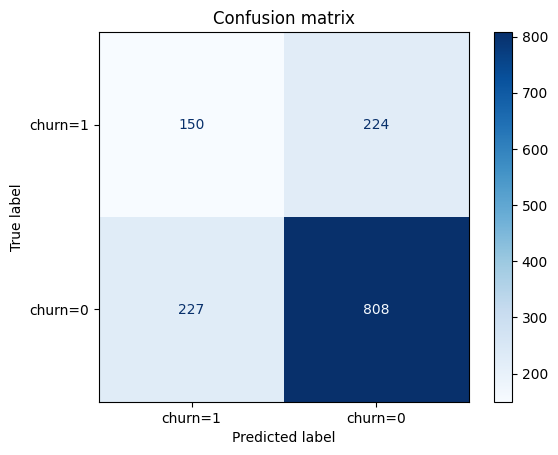

Classifier accuracy: 67.99%
Precision w.r.t class remain: 0.78
Precision w.r.t class chrun: 0.40
Recall w.r.t class remain: 0.78
Recall w.r.t class chrun: 0.40


In [53]:
kernel = 'sigmoid'

model = SVC(kernel=kernel)
model.fit(X_train, y_train)

y_predict = model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_predict, labels=[1, 0])
np.set_printoptions(precision=2)

disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=['churn=1', 'churn=0'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.show()


accuracy = accuracy_score(y_test, y_predict)
precision_remain = precision_score(y_test, y_predict, pos_label=0)
precision_churn = precision_score(y_test, y_predict, pos_label=1)
recall_remain = recall_score(y_test, y_predict, pos_label=0)
recall_churn = recall_score(y_test, y_predict, pos_label=1)

print('Classifier accuracy: ' + "{0:.2f}".format(accuracy*100) + '%')
print('Precision w.r.t class remain: ' + "{0:.2f}".format(precision_remain))
print('Precision w.r.t class chrun: ' + "{0:.2f}".format(precision_churn))
print('Recall w.r.t class remain: ' + "{0:.2f}".format(recall_remain))
print('Recall w.r.t class chrun: ' + "{0:.2f}".format(recall_churn))